<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/LinearProgramExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Import linear solver from Google OR-Tools
from ortools.linear_solver import pywraplp

In [17]:
def present_solver_solution(solver):
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', round(solver.Objective().Value(), 2))
        for var in solver.variables():
            print(f'{str(var)} =', round(var.solution_value(), 2))
    else:
        print('The problem does not have an optimal solution.')

    return status

# LP Examples

## Non-integer LPs

### Simple maximization LP (2.1.1)

Situation: Paula works at the uni (U, 50 EUR/h) and as a tutor (T, 30 EUR/h).

For U: Teaching material 10 pages, driving 20 km, preparation time 3 h.

For T: Teaching material 20 pages, driving 10 km, preparation time 1 h.

Limits: 160 pages, 110 km, 15 h.

Target function: Maximize income.

#### LP construction

LP:

$\begin{align}
\max 50x +30y \\
\text{s.t.} 10 x +20 y &\le 160\\
20 x +10 y &\le 110 \\
3 x + 1y &\le 15\\
x &≥ 0 \\
y &≥ 0
\end{align}$

#### Solving the LP

In [1]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the two non-negative variables.
x = solver.NumVar(0, solver.infinity(), 'h_uni ')
y = solver.NumVar(0, solver.infinity(), 'h_tutor')
# Page restriction.
solver.Add(10 * x + 20 * y <= 160)
# Driving restriction.
solver.Add(20 * x + 10 * y <= 110)
# Preparation time restriction.
solver.Add( 3 * x + 1 * y <= 15)
# Set as maximization problem and input target function.
solver.Maximize(50 * x + 30 * y)

NameError: ignored

In [ ]:
status = present_solver_solution(solver)

#### Plot the solution

In [ ]:
# Plot the feasible region.
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

# Plot the feasible region.
plt.imshow( ((y>=0) & (20*y<=160-10*x) & (10*y<=110-20*x) & (y<=15-3*x)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),
            origin="lower",
            cmap="Greys",
            alpha = 0.3);


# Plot the lines defining the constraints.
x = np.linspace(0, 16, 2000)
# 10x + 20y <= 160
y1 = (16-x)/2
# 20x + 10y <= 110
y2 = (11-2*x)
# 3x + y <= 15
y3 = 15-3*x

# Plot the lines defining the target function - with optimal values.
# 50x + 30y = b such that for x = 2.0 and y = 7.0 b = 310.0
f = -5/3 * x + 31/3

# Make plot
plt.plot(x, y1, label=r'$10x + 20y \leq 160$')
plt.plot(x, y2, label=r'$20x + 10y \leq 110$')
plt.plot(x, y3, label=r'$3x + y \leq 15$')

plt.plot(x, f, label=r'$\max 50 y + 30x = 330 $')
plt.plot(2, 7, 'bo', label=r'$Optimum (2,7)$')

plt.xlim(0, 16)
plt.ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

### Simple maximization LP (2.10.2)

Situation: Weekly requirements of at least 12t G, 8t M and 24t F.

Source1: Cost of 200, 6 G/d, 2 M/d,  4 F/d.
Source2: Cost of 160, 2 G/d, 2 M/d, 12 F/d.

Target: Cheapest setting to use the sources (in days, not necessarily as an integer soution required).

#### LP construction

LP:

$\begin{align}
\min 200x +160y \\
\text{s.t.} 6 x +2 y &\ge 12\\
2 x +2 y &\ge 8 \\
4 x + 12y &\ge 24\\
x &≥ 0 \\
y &≥ 0 \\
x &≤ 7 \\
y &\le 7
\end{align}$

#### Solve the LP

In [ ]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the two non-negative variables.
x = solver.NumVar(0, solver.infinity(), 't_source1')
y = solver.NumVar(0, solver.infinity(), 't_source1')
# Page restriction.
solver.Add(6 * x + 2 * y >= 12)
# Driving restriction.
solver.Add(2 * x + 2 * y >= 8)
# Preparation time restriction.
solver.Add(4 * x + 12 * y >= 24)
# Set as minimization problem and input target function.
solver.Minimize(200 * x + 160 * y)

In [ ]:
status = present_solver_solution(solver)

Solution:
Objective value = 680.0
x = 1.0
y = 3.0


#### Plot the solution

Text(0, 0.5, '$y$')

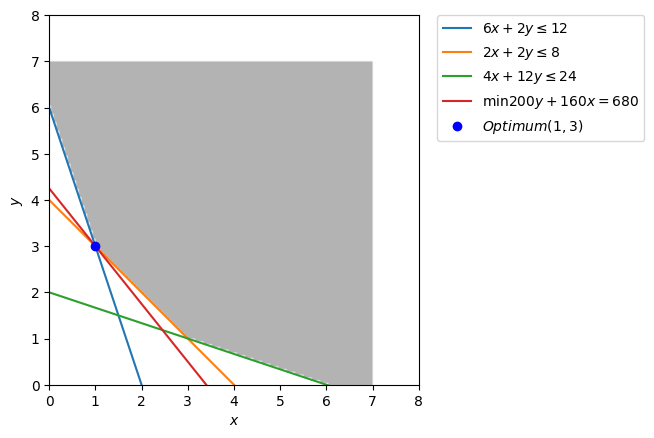

In [ ]:
# Plot the feasible region.
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

# Plot the feasible region.
plt.imshow( ((y<=7) & (x<=7) &(2*y>=12-6*x) & (2*y>=8-2*x) & (12*y>=24-4*x)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),
            origin="lower",
            cmap="Greys",
            alpha = 0.3);


# Plot the lines defining the constraints.
x = np.linspace(0, 8, 200)
# 6x + 2y >= 12
y1 = (12 - 6*x)/2
# 2x + 2y <= 8
y2 = (8 - 2*x)/2
# 4x + 12y <= 24
y3 = (24 - 4*x)/12

# Plot the lines defining the target function - with optimal values.
# y = -200/160x + b such that the line intersects x = 1.0 and y = 3.0: 3+20/16 = b ==> b = 68/16
f = -20/16 * x + 68/16

# Make plot
plt.plot(x, y1, label=r'$6x + 2y\leq 12$')
plt.plot(x, y2, label=r'$2x + 2y \leq 8$')
plt.plot(x, y3, label=r'$4x + 12y \leq 24$')

plt.plot(x, f, label=r'$\min 200 y + 160x = 680 $')
plt.plot(1, 3, 'bo', label=r'$Optimum (1,3)$')

plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

If Source1 will increase efficieny and thus reduce production costs by $k$, the solution may change as well. This changes the target function (red) and thus another optimal solution (corner of the polygon of feasable solutions) may be reached.

### Example 2.10.14. - Radio sale, teaching workers
A company shall produce 20000 radios within the next four weeks. Radios, which are delivered at the end of the first week have a return of 20 dollars, the ones from the second week 18, from the third 16 and from the last week 14 dollars.

Currently there are 40 workers working for the company. Each produces 50 radios per week.
Every worker can be taken out of the production to instruct 3 new workers - which all can work in the next week (or teach themselves).

How to maximize the profit when producing the 20000 radios?

#### Construct the LP

**Solutions**: Notice, that since the company has a fixed number of workers to begin with, the radios per worker are fixed and the number of workers in the next weeks depend entirely on the number of instructing workers - these numbers of instructing workers are our variables.

Let $\delta_i$ be the number of instructors from week $i$. Notice, how it cannot be beneficial, to let anybody teach in the fourth week, since the resulting new workers will not work for the target goal. Thus set $\delta_4=0$ to begin with.
It may seem unintuitive, but by design we like to introduce a constraint to limit the amount of radios. Afterall, the task is not to maximize the output of radios indefinitively, and worker costs are not considered either. We can simplify the formula for the number of produced radios $R$ as follows:

$\begin{align}
    20000 &\le 50 \big(40-\delta_1\big) + 50 \big(40+3\delta_1-\delta_2\big) + 50 \big(40+3(\delta_1+\delta_2)-\delta_3\big) + 50 \big(40+3(\delta_1+\delta_2+\delta_3)\big)\\
    &= 50 \big( 40- \delta_1 + 40+3\delta_1-\delta_2 + 40+3(\delta_1+\delta_2)-\delta_3 + 40+3(\delta_1+\delta_2+\delta_3)\big)\\
    &= 50 \big( 4*40 -\delta_1 +3\delta_1-\delta_2 +3(\delta_1+\delta_2)-\delta_3 +3(\delta_1+\delta_2+\delta_3)\big)\\
    &= 50 \big( 4*40 +2\delta_1-\delta_2 +3 \delta_1+ 3\delta_2 - \delta_3 +3\delta_1+3\delta_2+3\delta_3\big)\\
    &= 50 \big( 4*40 + 8\delta_1 + 5\delta_2 + 2\delta_3 \big)\\
    &= 1600 + 50 \: ( 8\delta_1 + 5\delta_2 + 2\delta_3 )\\
    18400 &\le 50 \: ( 8\delta_1 + 5\delta_2 + 2\delta_3 )\\
    368 &\le 8\delta_1 + 5\delta_2 + 2\delta_3 \\
\end{align}$

Now we construct the LP:

LP:

$\begin{align}
    \max 20 \big(40-\delta_1\big) + &18 \big(40+3\delta_1-\delta_2\big) + 16 \big(40+3(\delta_1+\delta_2)-\delta_3\big) + 14 \big(40+3(\delta_1+\delta_2+\delta_3)\big)\\
    \text{s.t.} \ \delta_1 &\le 40 &&\text{(instructor limit first week)}\\
    \delta_2 &\le 40+3 \delta_1 &&\text{(instructor limit second week)}\\
    \delta_3 &\le 40+3 (\delta_1 + \delta_2) &&\text{(instructor limit third week)}\\
    8\delta_1 + 5\delta_2 + 2\delta_3 &\le 368 &&\text{(production goal)}
\end{align}$

#### Solve the LP

In [9]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the non-negative variables for instructors per week.
delta1 = solver.NumVar(0, solver.infinity(), 'delta_1')
delta2 = solver.NumVar(0, solver.infinity(), 'delta_1')
delta3 = solver.NumVar(0, solver.infinity(), 'delta_1')
# Worker limit (first week).
solver.Add(delta1 <= 40)
# Worker limit (second week, with possibly new workers).
solver.Add(delta2 <= 40 + 3 * delta1)
# Worker limit (third week, with possibly new workers).
solver.Add(delta3 <= 40 + 3 * (delta1 + delta2))
# Radio production goal.
solver.Add(8 * delta1 + 5 * delta2 + 2 * delta3 <= 368)
# Set as maximization problem and input target function.
solver.Maximize(20 * (40 - delta1) + 18 * (40 + 3 * delta1- delta2) + 16 * (40 + 3 * (delta1 + delta2) - delta3) + 14 * (40 + 3 * (delta1 + delta2 + delta3)))

In [18]:
status = present_solver_solution(solver)

Solution:
Objective value = 8371.2
delta_1 = 40.0
delta_1 = 9.6
delta_1 = 0.0


Lets check that the constraint on the number of computed radios is maximized as desired:

In [24]:
8 * delta1.solution_value() + 5 * delta2.solution_value() + 2 * delta3.solution_value()

368.00000000000006

## Integer Linear Program

### Example 2.10.3.

In [ ]:
# Instantiate a CBC solver - for integer variables.
solver = pywraplp.Solver.CreateSolver('CBC')
# Create the two non-negative integer variables.
x = solver.IntVar(0, solver.infinity(), 'door')
y = solver.IntVar(0, solver.infinity(), 'frame')
# Page restriction.
solver.Add( x + 3 * y <= 24)
# Driving restriction.
solver.Add( x + 10 * y <= 10)
# Preparation time restriction.
solver.Add( 4 * x + y <= 28)
# Set as maximization problem and input target function.
solver.Maximize( 50 * x + 30 * y)

status = present_solver_solution(solver)

Solution:
Objective value = 350.0
x = 7.0
y = 0.0
